In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import math
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
print("Shape :Data points" ,data.shape[0],"and Features",data.shape[1])
print("Features of data are",data.columns)
print("Null data in credit card", data.isnull().any().sum())

#We do not have any null data

Shape :Data points 284807 and Features 31
Features of data are Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Null data in credit card 0


In [4]:
#Time analysis and relation with fruad
#Time is in seconds
print("Time analysis")
print(data['Time'].describe())

Time analysis
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


The Time maximum is 172792 seconds which is equal to 172792/60*60 = 47.99 ~ 48 hours
- i.e. 2 days of span 
- We have here 2 days of data
- We will convert the seconds in hour 

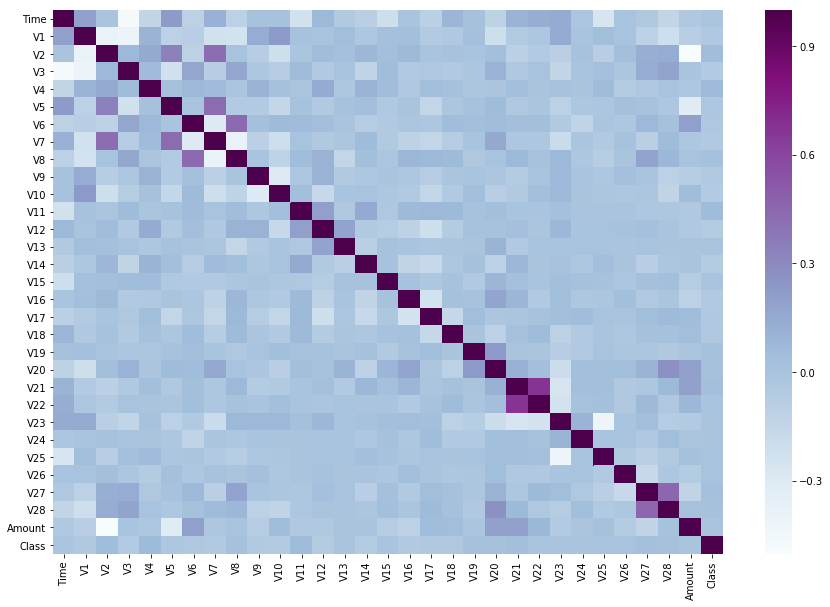

In [5]:
plt.figure(figsize=(15,10)) 
sns.heatmap(data=data.corr(method="spearman"),cmap="BuPu")

Heatmap analysis
- Not much of correlation seems to be there in data
- However, V27 V28 V21 V22 seems to have some relation as color is darker in those blocks.


In [6]:
data_Time = data[['Time', 'Amount', 'Class']].copy()
def to_Hour(second):
    return datetime.datetime.utcfromtimestamp(second)

data_Time['Date']=data_Time.Time.apply(to_Hour)
data_Time['Hour']=data_Time.Date.dt.hour 
data_Time.drop(['Time','Date'],axis=1,inplace=True)


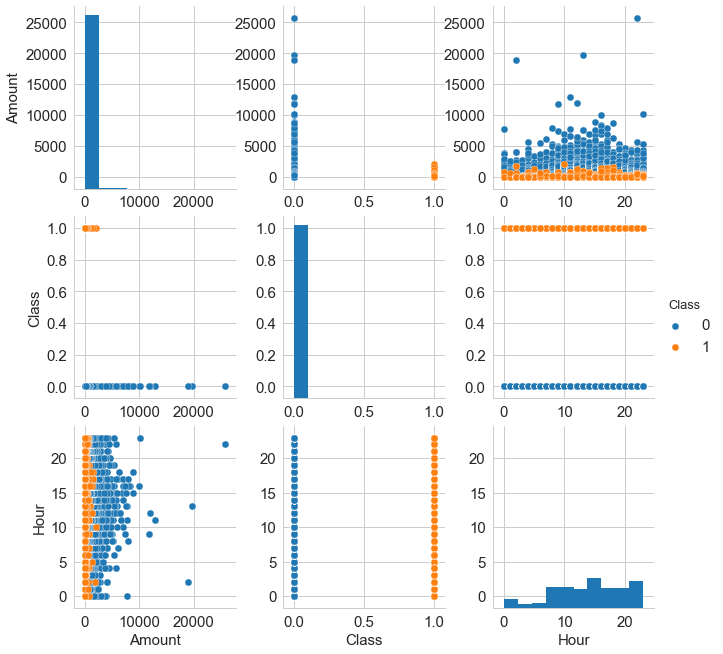

In [7]:
sns.set_context("notebook", font_scale=1.5, rc={"font.size":1,"axes.labelsize":15})

sns.set_style("whitegrid");
sns.pairplot(data_Time, hue="Class",size=3);
  

By this pair plot 
- The fraud amount are lesser than the valid amount transactions.
- Fraud transactions are performed all day log just like the valid transactions.

Checking the graph result by data:

In [8]:
data_Group= data_Time.groupby('Class')
data_Group.describe()

Amount                                                              \
          count        mean         std  min   25%    50%     75%       max   
Class                                                                         
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16   
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87   

           Hour                                                    
          count       mean       std  min   25%   50%   75%   max  
Class                                                              
0      284315.0  14.050623  5.833478  0.0  10.0  15.0  19.0  23.0  
1         492.0  11.646341  6.663342  0.0   5.0  12.0  17.0  23.0

The results are same,
- We have mean 14 hour in case of fraud transactions and 11 hour in case of valid transactions
- Both the transaction's max hour is same i.e. all the transactions are running all day.

- Lesser amount is taken by the farud transaction - Max= 2125.67 


##Time analysis

- At what time people shop
- Is there any change in the way the fraudent transactions are performed

Text(0,0.5,'No Of Transactions')

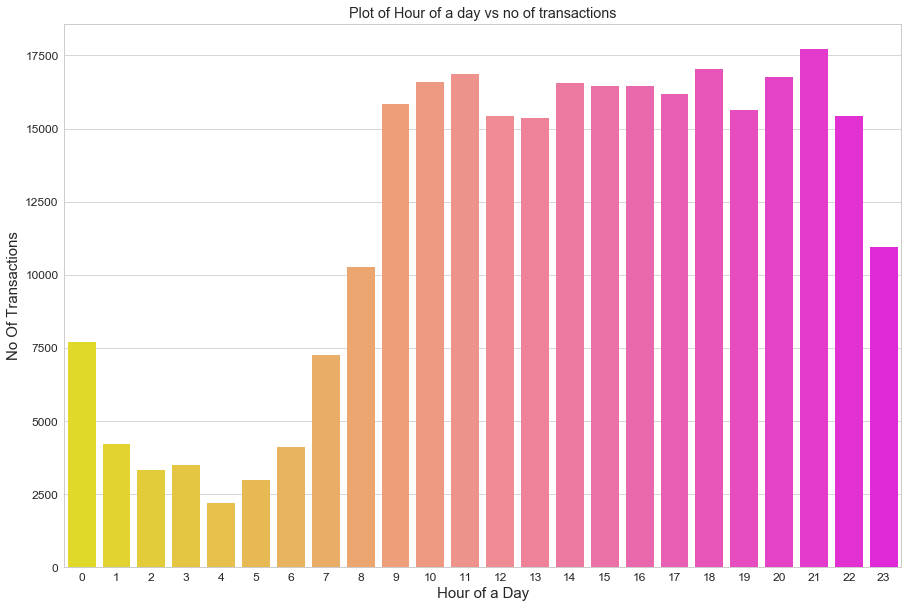

In [9]:
plt.figure(figsize=(15,10))
sns.set_context("paper", font_scale=1.5, rc={"font.size":1,"axes.labelsize":15})

pl=sns.countplot(x='Hour', data=data_Time,palette='spring_r')
    pl.set_title("Plot of Hour of a day vs no of transactions")
pl.set_xlabel('Hour of a Day')
pl.set_ylabel('No Of Transactions') 
 

- People engage in shopping after 10 Or 11

Text(0,0.5,'No Of Transactions')

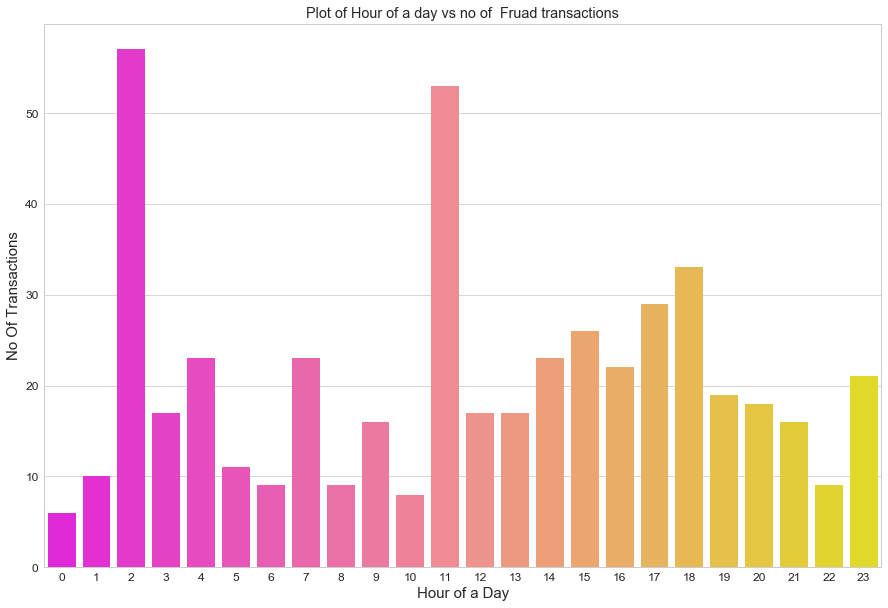

In [10]:
data_Fruad=data_Time[data_Time["Class"]==1]
data_Valid=data_Time[data_Time["Class"]==0]
plt.figure(figsize=(15,10))
sns.set_context("paper", font_scale=1.5, rc={"font.size":1,"axes.labelsize":15})

pl=sns.countplot(x='Hour', data=data_Fruad,palette='spring')
pl.set_title("Plot of Hour of a day vs no of  Fruad transactions")
pl.set_xlabel('Hour of a Day')
pl.set_ylabel('No Of Transactions')  

- For Fraud transacions we can see sudden increase in no of transactions at 2 and 11 

Text(0,0.5,'No Of Transactions')

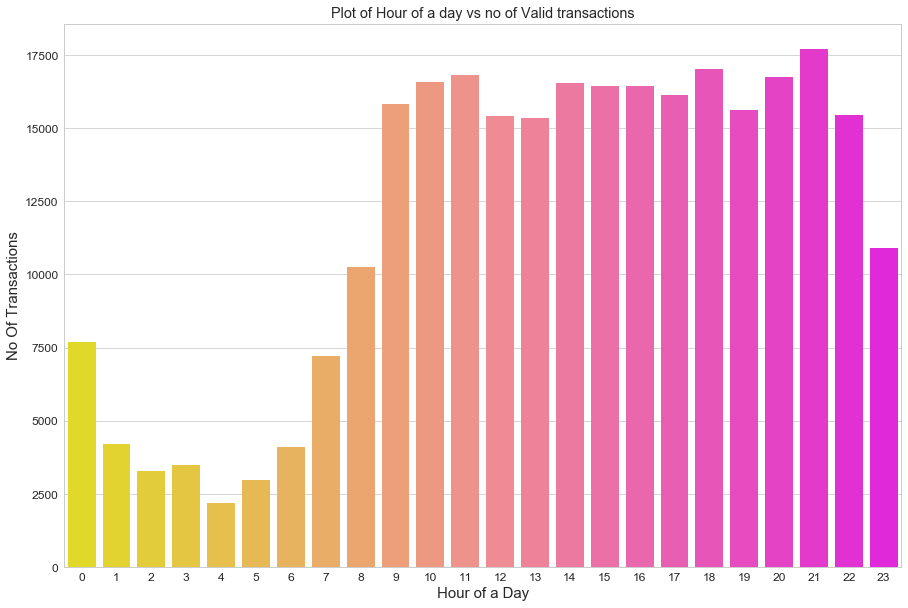

In [11]:

plt.figure(figsize=(15,10))
pl=sns.countplot(x='Hour', data=data_Valid,palette='spring_r')
pl.set_title("Plot of Hour of a day vs no of Valid transactions")
pl.set_xlabel('Hour of a Day')
pl.set_ylabel('No Of Transactions') 

- For valid transactions No of trasanctions are way more higher than fraud ones.
- Not much can be concluded from the data, except the timing i.e. at 2 and 11 hours of day the shopping of fraud transaction is increased

Task 2: Let's define a matric
similarity(i,j) = cosine^-1(dot product (vi, vj) / (length(vi) * length(vj)) )
Take out any sample from the data set which contains no less than 100 transactions, for every transaction in the sample find out top 10 transactions in the dataset which have the lowest similarity(i,j).

note: the sample should contain the similar distribution of classes as the original data set
ex:
Sample S = {1, 34, 989, 1000}

given transaction id = 1 , class = 1
-------------------
similar transactions
-------------------
class = 1 # similarity = 0.0023 # transaction id = 0
class = 1 # similarity = 0.02312 # transaction id = 89
class = 1 # similarity = 0.02498 # transaction id = 2034
...
--------------------------------------------------------------------------
given transaction id = 34, class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 1.005 # transaction id = 523212
class = 1 # similarity = 1. 2673 # transaction id = 500001
class = 1 # similarity = 1. 3459 # transaction id = 24

In [15]:
#Take 100 rows of sample
data_sample= data.sample(n=100)
data_sample.groupby("Class").describe()
 

Amount                                                        Time  \
       count       mean         std  min   25%   50%   75%     max count   
Class                                                                      
0       99.0  89.244646  254.464302  0.0  3.59  15.0  50.0  2150.0  99.0   
1        1.0   1.000000         NaN  1.0  1.00   1.0   1.0     1.0   1.0   

                       ...           V8              V9                      \
               mean    ...          75%       max count      mean       std   
Class                  ...                                                    
0      92627.969697    ...     0.394833  2.325999  99.0  0.110478  1.169179   
1      19762.000000    ...    -0.356595 -0.356595   1.0 -6.380125       NaN   

                                                         
            min       25%       50%       75%       max  
Class                                                    
0     -2.493124 -0.557812 -0.046702  0.812270  5.357180  
1     -6.380125 -6.380125 -6.380125 -6.380125 -6.380125  

[2 rows x 240 columns]

In [16]:
#We have 284807*31 population and 100*31 sample size
#We will lfirst transpose sample matrix to 31*100 and then will do dot product of the two 
#this will give us the numerator of the formula - dot product of the two vectors

data_sam_Transpose= data_sample.transpose()
data_dot_product= data.dot(data_sam_Transpose)

#Find distance from origin of the dataframe in both sample and population matrix
#store the distances in a seperate dataframes for each population and sample
data_dist_Population=pd.DataFrame(np.sqrt(np.sum(np.square(data),axis=1)))
data_dist_sam=pd.DataFrame(np.sqrt(np.sum(np.square(data_sample),axis=1)))

#We have now distance population size 284807*1 and sample distance of size 100*1
#Again we will transpose the sample matrix to 1*100
#And will perform dot product of the two 
#this will give us the denominator of finding theta(similarity)
data_dist_sam_transpose= data_dist_sam.transpose()
data_distance= data_dist_Population.dot(data_dist_sam_transpose)

#Now we will finally divide the dot product with the distances
data_required= data_dot_product/data_distance

#Rounding is performed as cosine inverse was throwing error in some case when numbers were too large ex(1.0000000002)
data_required=data_required.round(14)

#Perform cosine inverse on dataframe that we obtained from above method
data_Inversed= data_required.applymap(lambda x: math.acos(x))


In [17]:
#Lookup of dataframe that we obtained
data_Inversed.head() 

,59165,91655,114525,178407,146608,133531,151220,259465,2085,70063,...,267373,279473,154540,112289,79129,150055,44446,212702,267816,249721
0,1.569913,1.565340,1.570782,1.570676,1.570785,1.570757,1.562026,1.570491,1.567679,1.568287,...,1.570729,1.570710,1.570713,1.570774,1.570778,1.570527,1.569939,1.570786,1.570732,1.570635
1,1.570178,1.566919,1.570795,1.570711,1.570799,1.570769,1.564606,1.570583,1.569089,1.569005,...,1.570749,1.570740,1.570739,1.570781,1.570782,1.570596,1.570173,1.570814,1.570743,1.570679
2,1.567272,1.562698,1.568142,1.568035,1.568145,1.568117,1.559384,1.567851,1.565057,1.565645,...,1.568088,1.568069,1.568072,1.568133,1.568139,1.567885,1.567299,1.568146,1.568091,1.567995
3,1.561822,1.557250,1.562691,1.562584,1.562693,1.562665,1.553937,1.562399,1.559591,1.560195,...,1.562636,1.562618,1.562620,1.562682,1.562687,1.562435,1.561848,1.562694,1.562640,1.562543
4,1.541384,1.536816,1.542251,1.542146,1.542255,1.542225,1.533505,1.541960,1.539144,1.539759,...,1.542198,1.542179,1.542182,1.542242,1.542248,1.541997,1.541410,1.542253,1.542201,1.542105


In [18]:

#Loop thru the 100 sample size dataframe
for item in range(0,100):
    
    #Sort the dataframe for each column and take top 10 values
    sort = data_Inversed.sort_values(data_required.columns[item], ascending = True).head(10) 
    index=data_sample.index[item]
    print("-------------------")
    print("given transaction id =",index , "class =", data_sample.get_value(index, 'Class'))
    print("-------------------")
    print("similar transactions")    
    print("-------------------")
    
    #Iterate thru top 10 values and find similarity
    for similarItem in range(0,10): 
        indexSimilar=sort.index[similarItem]   
        print("class =", data.get_value(indexSimilar, 'Class') ,"# similarity =","%.10f" %sort.get_value(indexSimilar,index) ,"# transaction id =", indexSimilar) 


-------------------
given transaction id = 59165 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 59165
class = 0 # similarity = 0.0000845404 # transaction id = 75360
class = 0 # similarity = 0.0000862787 # transaction id = 107593
class = 0 # similarity = 0.0000895806 # transaction id = 87268
class = 0 # similarity = 0.0000896037 # transaction id = 135115
class = 0 # similarity = 0.0000897999 # transaction id = 75193
class = 0 # similarity = 0.0000938605 # transaction id = 99026
class = 0 # similarity = 0.0000939528 # transaction id = 78607
class = 0 # similarity = 0.0000954812 # transaction id = 107862
class = 0 # similarity = 0.0000956277 # transaction id = 37145
-------------------
given transaction id = 91655 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 91655
class = 0 # similarity = 0.0000442176 # transaction id = 81365
c

-------------------
given transaction id = 70343 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 70343
class = 0 # similarity = 0.0000197160 # transaction id = 59634
class = 0 # similarity = 0.0000277726 # transaction id = 56758
class = 0 # similarity = 0.0000299526 # transaction id = 53573
class = 0 # similarity = 0.0000391589 # transaction id = 110853
class = 0 # similarity = 0.0000424189 # transaction id = 60088
class = 0 # similarity = 0.0000431870 # transaction id = 98169
class = 0 # similarity = 0.0000439092 # transaction id = 132891
class = 0 # similarity = 0.0000536213 # transaction id = 64698
class = 0 # similarity = 0.0000537453 # transaction id = 77451
-------------------
given transaction id = 175627 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 175627
class = 0 # similarity = 0.0000087293 # transaction id = 208538

-------------------
given transaction id = 174645 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 174645
class = 0 # similarity = 0.0000218307 # transaction id = 189543
class = 0 # similarity = 0.0000295147 # transaction id = 184561
class = 0 # similarity = 0.0000317140 # transaction id = 193862
class = 0 # similarity = 0.0000320868 # transaction id = 255736
class = 0 # similarity = 0.0000321546 # transaction id = 263226
class = 0 # similarity = 0.0000329409 # transaction id = 165549
class = 0 # similarity = 0.0000330439 # transaction id = 218154
class = 0 # similarity = 0.0000333784 # transaction id = 180470
class = 0 # similarity = 0.0000334027 # transaction id = 212628
-------------------
given transaction id = 170514 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 170514
class = 0 # similarity = 0.0000272331 # transaction id

-------------------
given transaction id = 114107 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 114107
class = 0 # similarity = 0.0000230673 # transaction id = 142965
class = 0 # similarity = 0.0000312432 # transaction id = 118305
class = 0 # similarity = 0.0000325638 # transaction id = 86942
class = 0 # similarity = 0.0000326092 # transaction id = 255358
class = 0 # similarity = 0.0000332009 # transaction id = 93206
class = 0 # similarity = 0.0000336773 # transaction id = 126097
class = 0 # similarity = 0.0000361549 # transaction id = 141010
class = 0 # similarity = 0.0000369050 # transaction id = 172042
class = 0 # similarity = 0.0000383153 # transaction id = 117898
-------------------
given transaction id = 269811 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 269811
class = 0 # similarity = 0.0000020445 # transaction id =

-------------------
given transaction id = 71792 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 71792
class = 0 # similarity = 0.0000305853 # transaction id = 115702
class = 0 # similarity = 0.0000393672 # transaction id = 128358
class = 0 # similarity = 0.0000411381 # transaction id = 129162
class = 0 # similarity = 0.0000449689 # transaction id = 53354
class = 0 # similarity = 0.0000479293 # transaction id = 96417
class = 0 # similarity = 0.0000489236 # transaction id = 60670
class = 0 # similarity = 0.0000490465 # transaction id = 85251
class = 0 # similarity = 0.0000490636 # transaction id = 114527
class = 0 # similarity = 0.0000498881 # transaction id = 74744
-------------------
given transaction id = 117793 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 117793
class = 0 # similarity = 0.0000027964 # transaction id = 1138

-------------------
given transaction id = 76469 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 76469
class = 0 # similarity = 0.0000103082 # transaction id = 73428
class = 0 # similarity = 0.0000303924 # transaction id = 107644
class = 0 # similarity = 0.0000387515 # transaction id = 76196
class = 0 # similarity = 0.0000441808 # transaction id = 46543
class = 0 # similarity = 0.0000447439 # transaction id = 105116
class = 0 # similarity = 0.0000448803 # transaction id = 95239
class = 0 # similarity = 0.0000451604 # transaction id = 59283
class = 0 # similarity = 0.0000456898 # transaction id = 47090
class = 0 # similarity = 0.0000457651 # transaction id = 64496
-------------------
given transaction id = 184750 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 184750
class = 0 # similarity = 0.0000011662 # transaction id = 175360

-------------------
given transaction id = 55373 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 55373
class = 0 # similarity = 0.0000610057 # transaction id = 84227
class = 0 # similarity = 0.0000612800 # transaction id = 143919
class = 0 # similarity = 0.0000654573 # transaction id = 78206
class = 0 # similarity = 0.0000669231 # transaction id = 76871
class = 0 # similarity = 0.0000688694 # transaction id = 145128
class = 0 # similarity = 0.0000689366 # transaction id = 52551
class = 0 # similarity = 0.0000715613 # transaction id = 128521
class = 0 # similarity = 0.0000727316 # transaction id = 83641
class = 0 # similarity = 0.0000748656 # transaction id = 87051
-------------------
given transaction id = 224443 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 224443
class = 0 # similarity = 0.0000136704 # transaction id = 22282

-------------------
given transaction id = 126455 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 126455
class = 0 # similarity = 0.0000215309 # transaction id = 117872
class = 0 # similarity = 0.0000217692 # transaction id = 126036
class = 0 # similarity = 0.0000247127 # transaction id = 139027
class = 0 # similarity = 0.0000286963 # transaction id = 178392
class = 0 # similarity = 0.0000287385 # transaction id = 137828
class = 0 # similarity = 0.0000287444 # transaction id = 137746
class = 0 # similarity = 0.0000298406 # transaction id = 117454
class = 0 # similarity = 0.0000306441 # transaction id = 103369
class = 0 # similarity = 0.0000320166 # transaction id = 178350
-------------------
given transaction id = 93769 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 93769
class = 0 # similarity = 0.0000369700 # transaction id =

-------------------
given transaction id = 52677 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 52677
class = 0 # similarity = 0.0000300053 # transaction id = 60018
class = 0 # similarity = 0.0000311853 # transaction id = 99856
class = 0 # similarity = 0.0000323602 # transaction id = 132801
class = 0 # similarity = 0.0000327481 # transaction id = 81115
class = 0 # similarity = 0.0000333563 # transaction id = 87482
class = 0 # similarity = 0.0000333778 # transaction id = 85790
class = 0 # similarity = 0.0000337085 # transaction id = 122054
class = 0 # similarity = 0.0000338839 # transaction id = 107756
class = 0 # similarity = 0.0000340500 # transaction id = 144421
-------------------
given transaction id = 131998 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 131998
class = 0 # similarity = 0.0000286412 # transaction id = 1213

-------------------
given transaction id = 249721 class = 0
-------------------
similar transactions
-------------------
class = 0 # similarity = 0.0000000000 # transaction id = 249721
class = 0 # similarity = 0.0000119758 # transaction id = 276404
class = 0 # similarity = 0.0000131149 # transaction id = 230754
class = 0 # similarity = 0.0000134060 # transaction id = 284047
class = 0 # similarity = 0.0000138463 # transaction id = 195947
class = 0 # similarity = 0.0000140556 # transaction id = 265886
class = 0 # similarity = 0.0000146738 # transaction id = 243017
class = 0 # similarity = 0.0000152774 # transaction id = 192206
class = 0 # similarity = 0.0000158234 # transaction id = 225689
class = 0 # similarity = 0.0000174883 # transaction id = 176293
